In [6]:
import pandas as pd

income = pd.read_csv('../data/Income2.csv')
income = income.drop(income.columns[0], axis=1)


In [7]:
income.head(3)

,Education,Seniority,Income
0,21.586207,113.103448,99.917173
1,18.275862,119.310345,92.579135
2,12.068966,100.689655,34.678727


In [8]:
income.isnull().sum()

Education    0
Seniority    0
Income       0
dtype: int64

In [9]:
income.describe()

,Education,Seniority,Income
count,30.000000,30.000000,30.000000
mean,16.386207,93.862069,62.744733
std,3.810622,55.715623,27.013285
min,10.000000,20.000000,17.613593
25%,12.482759,44.827586,36.392043
50%,17.034483,94.482759,70.804791
75%,19.931034,133.275862,85.930608
max,21.586207,187.586207,99.917173


In [10]:
X = income.iloc[:, :2]
y = income.iloc[:, 2]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Model

In [13]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

In [16]:
def run_model(model, al_name, plot_index):
    model.fit(X_train, y_train.values.reshape(-1, ))
    y_pred = model.predict(X_test)
    
    accuracy = sqrt(mean_squared_error(y_test, y_pred))
    
#     color_code = {'low': 'red', 'medium': 'green', 'high': 'blue'}
    plot_index -= 1
    ax = axes[plot_index//3, plot_index%3]
    
#     colors_actual = [color_code[i] for i in y_test.iloc[:, 0]]
#     colors_pred = [color_code[i] for i in y_pred]
    
    ax.scatter(X_test.iloc[:, 1], y_test, color='blue', marker='.', label='Dot = Ground_truth')
    ax.scatter(X_test.iloc[:, 1], y_pred, color='red', facecolor='none', marker='o', label='Circle = Prediction')
    
    ax.legend(loc="lower right")
    leg = ax.get_legend()
    leg.legendHandles[0].set_color('black')
    leg.legendHandles[1].set_color('black')
    leg.legendHandles[1].set_facecolors('none')
    
    ax.set_title(al_name + " - error = " + str(round(accuracy, 4)))


[08:15:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Trang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


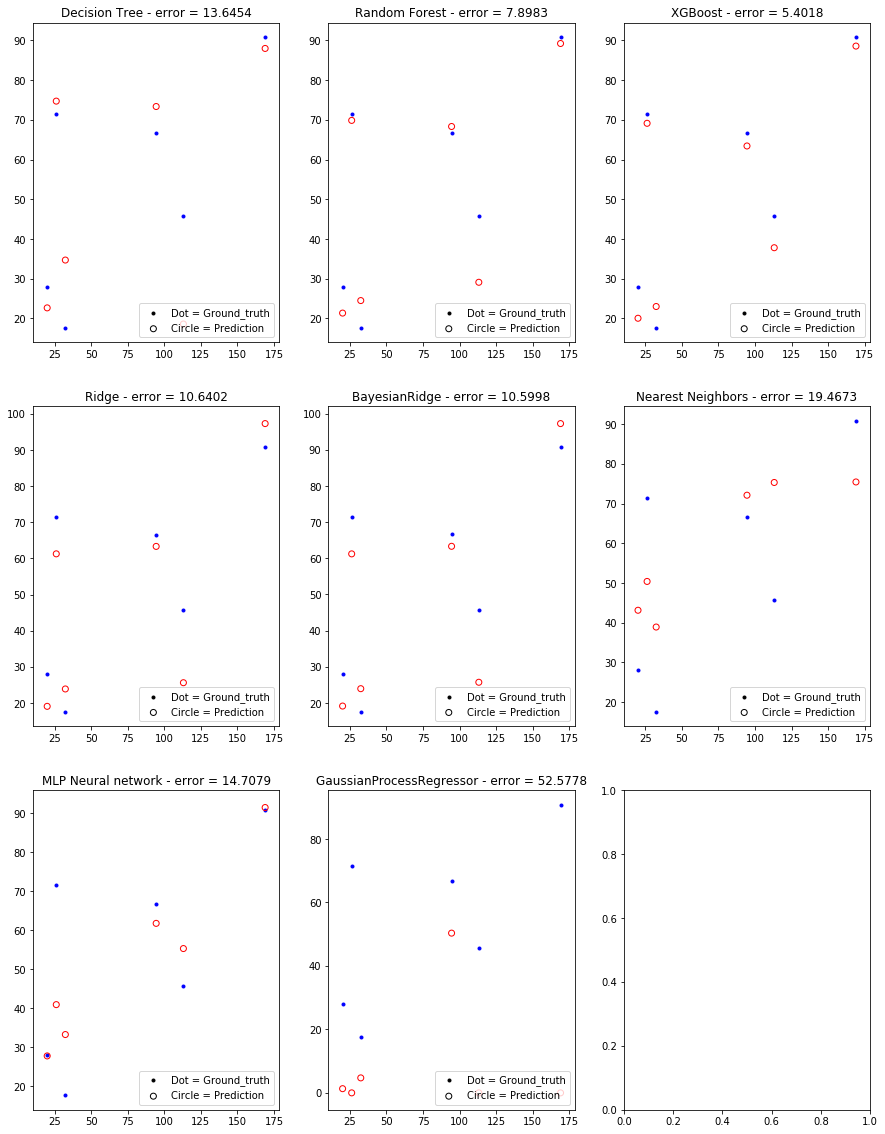

In [17]:
fig = plt.figure(figsize=(15,20))
axes = fig.subplots(nrows=3, ncols=3)

# ---- Decision Tree -----------
from sklearn import tree

model = tree.DecisionTreeRegressor(criterion='mse', max_depth=5)
run_model(model, "Decision Tree", 1)

# ----- Random Forest ---------------
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)
run_model(model, "Random Forest", 2)

# # ----- xgboost ------------
# # install xgboost
# # 'pip install xgboost' or https://stackoverflow.com/questions/33749735/how-to-install-xgboost-package-in-python-windows-platform/39811079#39811079
from xgboost import XGBRegressor

model = XGBRegressor()
run_model(model, "XGBoost", 3)

# # ----- Ridge ------------
from sklearn.linear_model import Ridge

model = Ridge()
run_model(model, "Ridge", 4)

# # ------ BayesianRidge ----------------
from sklearn.linear_model import BayesianRidge

model = BayesianRidge()
run_model(model, "BayesianRidge", 5)

# # -------- Nearest Neighbors ----------
from sklearn import neighbors

model = neighbors.KNeighborsRegressor()
run_model(model, "Nearest Neighbors", 6)

# ----------- Neural network - Multi-layer Perceptron  ------------
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
run_model(model, "MLP Neural network", 7)

# ----------- GaussianProcessRegressor  ------------
from sklearn.gaussian_process import GaussianProcessRegressor

model = GaussianProcessRegressor()
run_model(model, "GaussianProcessRegressor", 8)